In [1]:
import pandas as pd
import numpy as np
from joblib import load
from zeugma.embeddings import EmbeddingTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as plt

2024-04-05 15:35:13.414492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
def get_binary_data(path):
  reliable_types = ['clickbait', 'reliable', 'political']
  all_types = ['clickbait', 'reliable', 'political', 'unreliable', 'fake', 'conspiracy', 'bias', 'junksci', 'satire', 'rumor']
  df = pd.read_csv(path)
  df = df.drop(df[~df.type.isin(all_types)].index)
  df['type'] = np.where(df['type'].isin(reliable_types), 'reliable', 'fake')
  return df

def clean_string(str):
  lst = str.strip("]['").split("', '")
  res = ''
  for word in lst:
    res += word + ' '
  return res

def get_data(path):
  types = ['clickbait', 'reliable', 'political', 'unreliable', 'fake', 'conspiracy', 'bias', 'junksci', 'satire', 'rumor']
  df = pd.read_csv(path)
  df = df.drop(df[~df.type.isin(types)].index)
  for i in range(df.shape[0]):
    df.iat[i,3] = clean_string(df.iat[i,3])
  return df


fnc_simple = get_binary_data('FNC_lemmatized.csv')
rnc_simple = get_binary_data('RNC_lemmatized.csv')
data_simple = pd.concat([fnc_simple, rnc_simple])
test_sz_sim = int(data_simple.shape[0]/5)
content_train_sim, content_test_sim, type_train_sim, type_test_sim = train_test_split(data_simple.content, data_simple.type, test_size=test_sz_sim, random_state=47)


fnc_advanced = get_data('FNC_lemmatized.csv')
rnc_advanced = get_data('RNC_lemmatized.csv')
data_advanced = pd.concat([fnc_advanced, rnc_advanced])
test_sz_adv = int(data_advanced.shape[0]/5)
content_train_adv, content_test_adv, type_train_adv, type_test_adv = train_test_split(data_advanced.content, data_advanced.type, test_size=test_sz_adv, random_state=47)

In [8]:
def get_tokens(str):
  return str.strip("]['").split("', '")

simple_model = load('simple.joblib')
advanced_model = load('advanced.joblib')

: 

Simple model F1-score   : 0.8811102113757574


AttributeError: module 'matplotlib' has no attribute 'show'

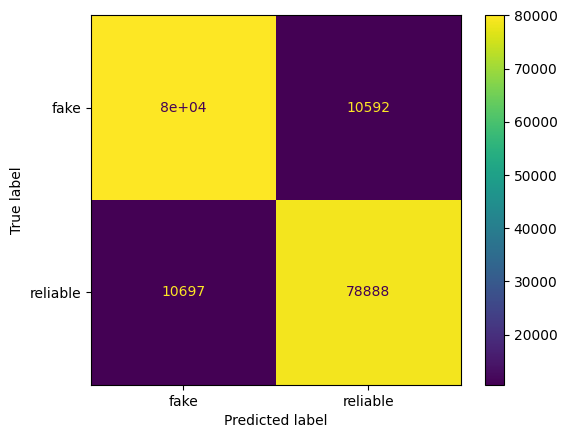

In [ ]:
predicted_sim = simple_model.predict(content_test_sim)
predicted_adv = advanced_model.predict(content_test_adv)

print('Simple model F1-score   : {}'.format(f1_score(type_test_sim, predicted_sim, pos_label='reliable')))
print('Advanced model F1-score : {}'.format(f1_score(type_test_adv, predicted_adv, average='weighted')))

ConfusionMatrixDisplay.from_predictions(type_test_sim, predicted_sim, labels=simple_model.classes_)

ConfusionMatrixDisplay.from_predictions(type_test_adv, predicted_adv, labels=advanced_model.classes_)